In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

C:\Users\zumss1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
# input image dimensions
img_rows, img_cols = 400, 400

# number of channels
img_channels = 3

#  data
path1 = 'C:/Users/zumss1/Documents/Thesis/Bilder'    #path of folder of images    
path2 = 'C:/Users/zumss1/Documents/Thesis/Bilder_farbig_resized'  #path of folder to save images    

listing = os.listdir(path1)
num_folders=size(listing)

for folder in listing:
    if folder == '.DS_Store':
        continue
    for root, dirs, files in os.walk(path1 + "/" + folder):
        herkunftsort = os.path.basename(os.path.dirname(root))
        print(herkunftsort)
        if root == '.DS_Store':
            continue
        for file in files:
            #print(file)
            if file == '.DS_Store':
                continue
            path = os.path.join(root,file)
            im = Image.open(path)   
            img = im.resize((img_rows,img_cols))
            #need to do some more processing here
            img.save(path2 +'/' +  herkunftsort + '_' + file, "JPEG")

400
Bilder
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Bilder
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Bilder
Biel
Biel
Biel
Biel
Biel
Biel
Biel
Bilder
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Boenigen
Bilder
Isenfluh
Isenfluh
Isenfluh
Isenfluh
Isenfluh
Bilder
Paul_Klee
Paul_Klee
Paul_Klee
Bilder
Pferdezentrum
Pferdezentrum
Bilder
Schosshalden
Schosshalden
Schosshalden
Schosshalden
Bilder
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Bilder
Waldrand
Waldrand
Waldrand
Waldrand
Waldrand
Waldrand
Bilder
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wys

[[ 32.  30.  33. ...  24.  20.  17.]
 [ 43.  62.  56. ...  41.  61.  49.]
 [146. 174. 133. ...  20.  38.  22.]
 ...
 [119. 128.  99. ... 127. 130. 139.]
 [ 54.  55.  59. ... 176. 176. 176.]
 [ 89.  93.  94. ... 135. 136. 157.]]


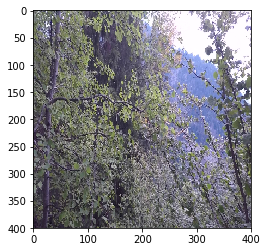

(7160, 480000)
(7160,)


In [5]:
imlist = os.listdir(path2)
if '.DS_Store' in imlist:
    imlist.remove('.DS_Store')
im1 = array(Image.open('Bilder_farbig_resized/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('Bilder_farbig_resized'+ '/' + im2)).flatten()
              for im2 in imlist],'f')

label=np.ones((imnbr,),dtype = int)
i=0
while i < len(imlist):
    fileName = imlist[i]
    #print(str(i) + "->" + fileName)
    if "Bergahorn" in fileName:
        label[i] = 0
        #print("Bergahorn")
    if "Spitzahorn" in fileName:
        label[i] = 1
        #print("Spitzahorn")
    if "Feldahorn" in fileName:
        label[i] = 2
        #print("Feldahorn")
    if "Buche" in fileName:
        label[i] = 3
        #print("Buche")
    if "Birke" in fileName:
        label[i] = 4
        #print("Birke")
    if "Eiche" in fileName:
        label[i] = 5
        #print("Eiche")
    if "Stechpalme" in fileName:
        label[i] = 6
        #print("Stechpalme")
    if "Ulme" in fileName:
        label[i] = 7
        #print("Ulme")
    if "Linde" in fileName:
        label[i] = 8
        #print("Linde")
    if "Kirsche" in fileName:
        label[i] = 9
        #print("Kirsche")
    if "Esche" in fileName:
        label[i] = 10
        #print("Esche")
    i += 1
#while i < len(imlist):
#    print(str(i) + "->" + imlist[i])
#label[0:89]=0
#label[89:187]=1
#label[187:]=2


data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

#img=immatrix[167].reshape(img_rows,img_cols)

plt.imshow(img)
plt.imshow(img,cmap='gray')
plt.show()
print (train_data[0].shape)
print (train_data[1].shape)

X_train shape: (5728, 3, 400, 400)
5728 train samples
1432 test samples


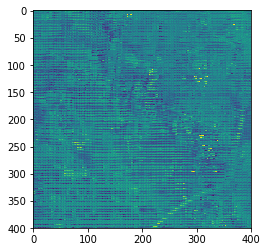

label :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 11
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(X, y) = (train_data[0],train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
plt.show()
print("label : ", Y_train[i,:])

C:\Users\zumss1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 400, 4..., padding="valid")`
  """
C:\Users\zumss1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\Users\zumss1\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5728 samples, validate on 1432 samples
Epoch 1/20
5728/5728 [==============================] - 2347s 410ms/step - loss: 12.5596 - acc: 0.2161 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 2/20
5728/5728 [==============================] - 2265s 395ms/step - loss: 12.6007 - acc: 0.2182 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 3/20
5728/5728 [==============================] - 2266s 396ms/step - loss: 12.6007 - acc: 0.2182 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 4/20
5728/5728 [==============================] - 2268s 396ms/step - loss: 12.5979 - acc: 0.2184 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 5/20
5728/5728 [==============================] - 2269s 396ms/step - loss: 12.6007 - acc: 0.2182 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 6/20
5728/5728 [==============================] - 2268s 396ms/step - loss: 12.6007 - acc: 0.2182 - val_loss: 12.7639 - val_acc: 0.2081
Epoch 7/20
5728/5728 [==============================] - 2274s 397ms/step - loss: 12.6007 - acc: 0.2182 - v

C:\Users\zumss1\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4582/4582 [==============================] - 1951s 426ms/step - loss: 0.7278 - acc: 0.7785 - val_loss: 0.7449 - val_acc: 0.7853
Epoch 2/20
4582/4582 [==============================] - 1941s 424ms/step - loss: 0.4690 - acc: 0.8616 - val_loss: 0.5009 - val_acc: 0.8325
Epoch 3/20
4582/4582 [==============================] - 1943s 424ms/step - loss: 0.3279 - acc: 0.9068 - val_loss: 0.6680 - val_acc: 0.7775
Epoch 4/20
4582/4582 [==============================] - 1951s 426ms/step - loss: 0.2158 - acc: 0.9393 - val_loss: 0.4438 - val_acc: 0.8386
Epoch 5/20
4582/4582 [==============================] - 1948s 425ms/step - loss: 0.1580 - acc: 0.9588 - val_loss: 0.3676 - val_acc: 0.8717
Epoch 6/20
4582/4582 [==============================] - 1947s 425ms/step - loss: 0.1327 - acc: 0.9581 - val_loss: 0.5144 - val_acc: 0.8525
Epoch 7/20
4582/4582 [==============================] - 1950s 426ms/step - loss: 0.1154 - acc: 0.9705 - val_loss: 0.3875 - val_acc: 0.8874
Epoch 8/20
4582/4582 [================

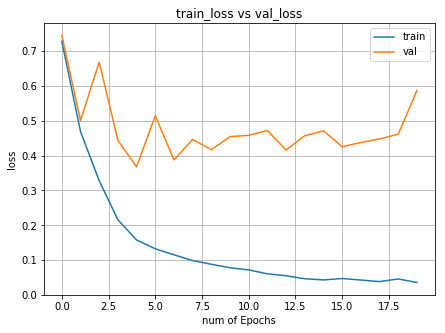

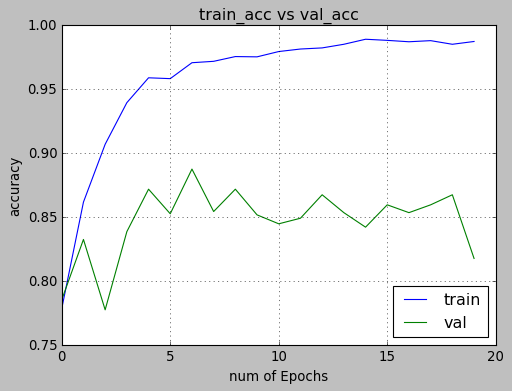

Test score: 3.87749081417169
Test accuracy: 0.3659217873765104
[1 1 6 4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [9]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(3, img_rows, img_cols)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# siehe https://stackoverflow.com/questions/42689066/convolutional-neural-net-keras-val-acc-keyerror-acc?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])


hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
            
            
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              verbose=1, validation_split=0.2)


# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()


# result       
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])